In [1]:
!pip install yfinance numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enter the stock/index ticker: INTC


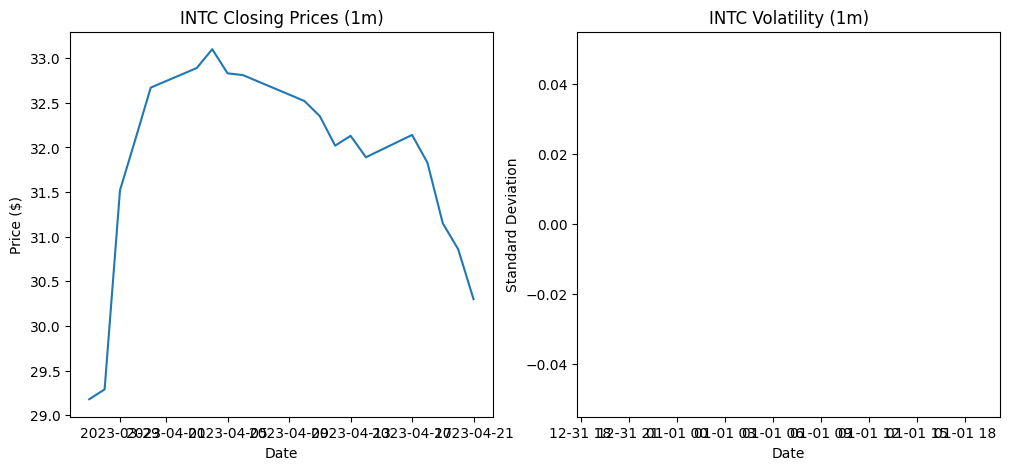

The volatility of INTC for the past 1m is 0.09



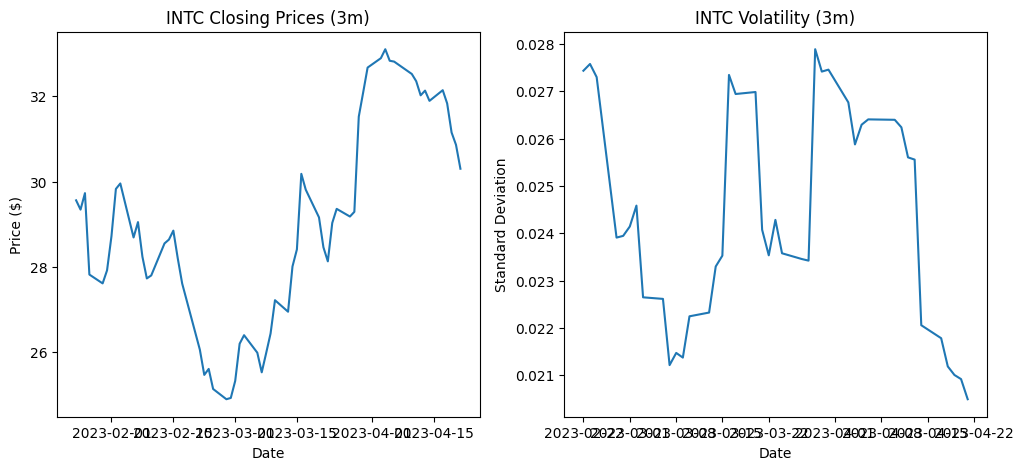

The volatility of INTC for the past 3m is 0.19



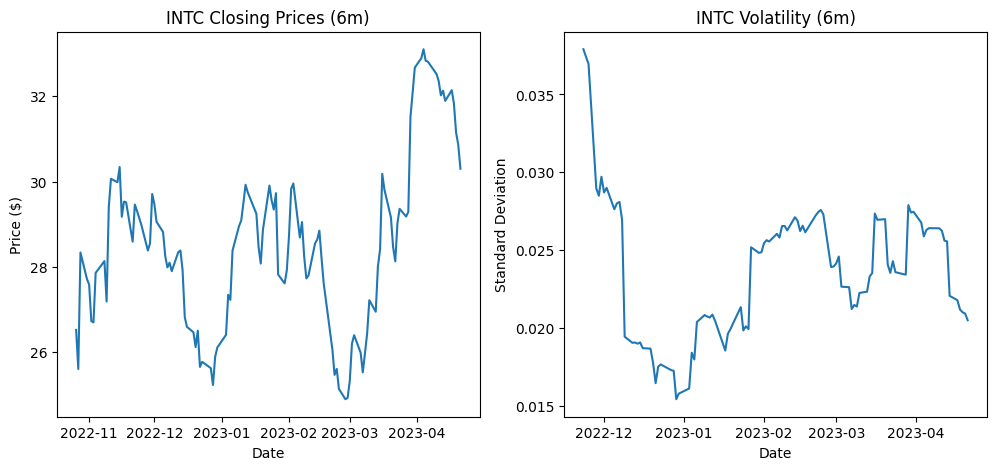

The volatility of INTC for the past 6m is 0.28



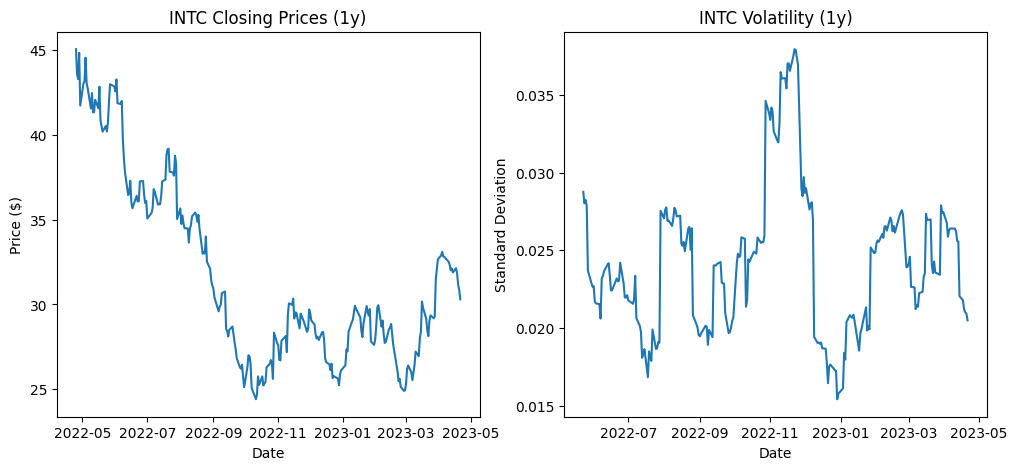

The volatility of INTC for the past 1y is 0.39



In [2]:
import yfinance as yf    
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta

# Get user input for stock/index ticker
ticker = input("Enter the stock/index ticker: ")

# Initialize time periods for analysis
time_periods = ["1m", "3m", "6m", "1y"]

for period in time_periods:

    # Define the start date and end date
    end_date = date.today()
    if period == "1m":
        start_date = end_date - timedelta(days=30)
    elif period == "3m":
        start_date = end_date - timedelta(days=90)
    elif period == "6m":
        start_date = end_date - timedelta(days=180)
    elif period == "1y":
        start_date = end_date - timedelta(days=365)

    # Get the historical data of the stock/index
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)

    # Calculate the returns and volatility
    returns = data["Close"].pct_change()
    volatility = returns.std() * np.sqrt(len(returns))

    # Create a figure with two subplots, one for closing prices and one for volatility
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    # Plot the closing prices over time
    ax1.plot(data.index, data["Close"])
    ax1.set_title(f"{ticker} Closing Prices ({period.capitalize()})")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Price ($)")

    # Plot the volatility over time
    ax2.plot(data.index, returns.rolling(window=20).std())
    ax2.set_title(f"{ticker} Volatility ({period.capitalize()})")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Standard Deviation")

    # Display the figure
    plt.show()

    # Print the results
    print(f"The volatility of {ticker} for the past {period} is {volatility:.2f}\n")